<a href="https://colab.research.google.com/github/korede97/Hamoye_ML_Externship/blob/main/004_Weekly_ML_CodeClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '15px' font color='navy'>The Complete Machine Learning Externship:</font> 

<font size = '6px' font color='red'>Weekly ML Code Club: 004</font> 

<font size  = 5 font color = 'blue'>Machine Learning Classification <font/>


# Load the Dataset

In [1]:
# Import all necessary libraries 
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# def load_data(url):
#   df = pd.read_csv(url)
#   # print(df.head())
#   print("Number of dimensions:", df.ndim)
#   print("Shape of dataframe:",df.shape)
#   return(df)

In [3]:
# Declare a variable for each csv file and read the data
cityFeats_url = "/content/gdrive/My Drive/Hamoye_ML_Externship/Classification/Capital_City_Fates.csv"


In [4]:
cityFeats = pd.read_csv(cityFeats_url)
cityFeats.head(n=10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [5]:
cityFeats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [6]:
# describe for numerical values
cityFeats.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
# describe for numerical values
cityFeats.describe(exclude = [np.number])

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,5,5,3,3,3,5,5,2,5,2
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561


There are 10 categorical variables and 1 continuous variable


# Exploratory Data Analysis




In [8]:
# missing values / NaN values
cityFeats.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [9]:
for col in cityFeats:
  print(col)

hours_per_week_bin
occupation_bin
msr_bin
capital_gl_bin
race_sex_bin
education_num_bin
education_bin
workclass_bin
age_bin
flag
y


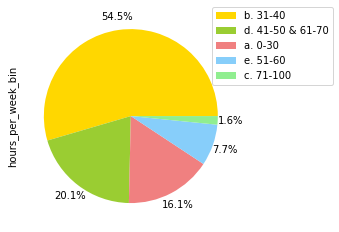

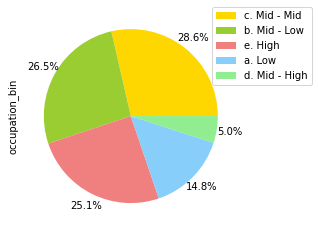

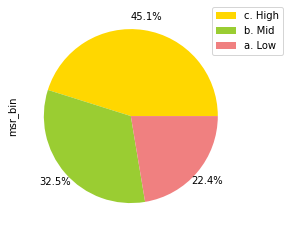

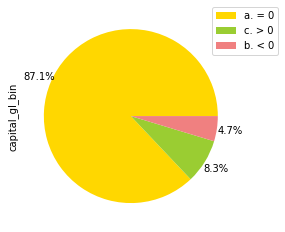

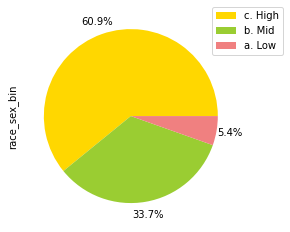

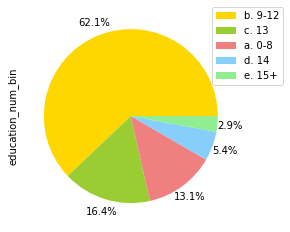

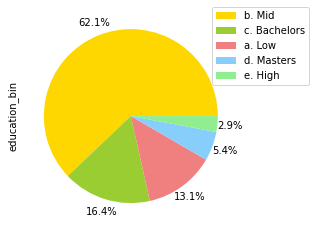

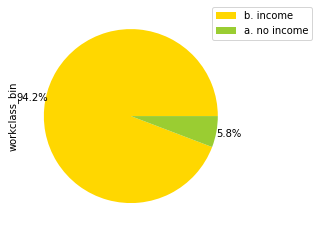

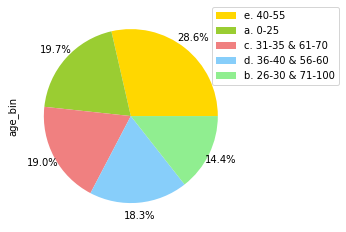

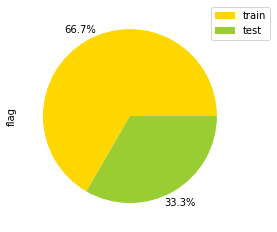

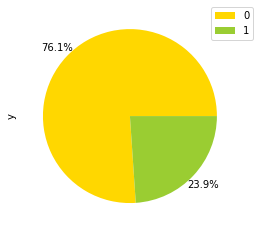

In [10]:
# cityFeats_valueCounts.plot(kind = 'pie', figsize = (8,6), labels = None, autopct="%1.1f%%", pctdistance=1.15, colors = colors_list )

import matplotlib.pyplot as plt
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', "capital_gl_bin", 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']


for col in cityFeats:
  plt.figure()
  cityFeats_valueCounts = cityFeats[col].value_counts()
  cityFeats_valueCounts.plot(kind = 'pie', labels = None, autopct="%1.1f%%", pctdistance=1.15, colors = colors_list )
  # plt.pie(x = cityFeats_valueCounts, labels = None, autopct="%1.1f%%", pctdistance=1.15, colors = colors_list,)
  plt.legend(labels=cityFeats_valueCounts.index, loc='upper left', bbox_to_anchor=(0.85,1.025)) 

plt.show()

In [180]:
# pip install squarify 

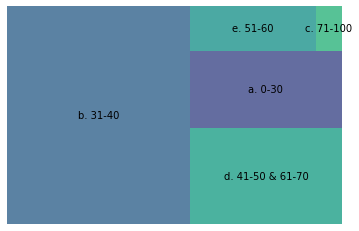

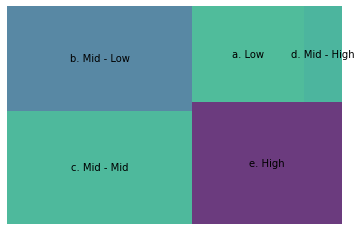

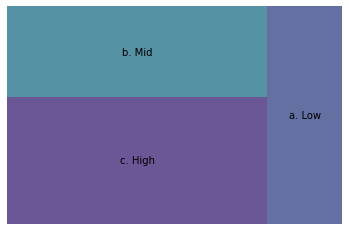

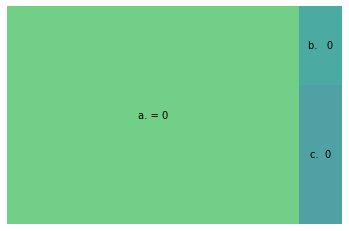

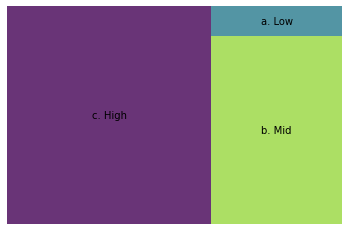

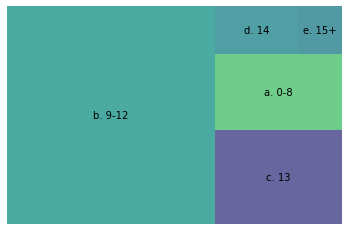

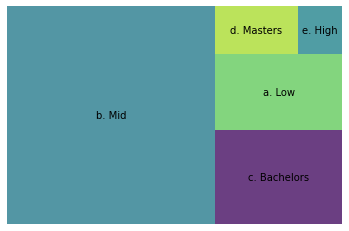

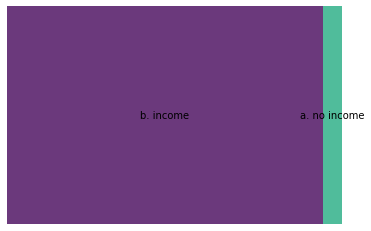

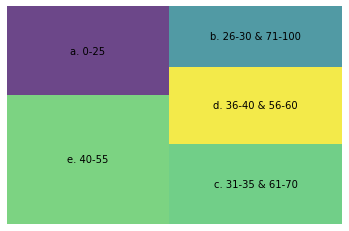

In [186]:
import squarify    

for col in cityFeats:
  plt.figure()
  cityFeats_valueCounts = cityFeats[col].value_counts() 
  squarify.plot(sizes=cityFeats_valueCounts, label=cityFeats_valueCounts.index, alpha=.8 )
  plt.xlabel(col)
  plt.axis('off')

plt.show()

#### Bar chart

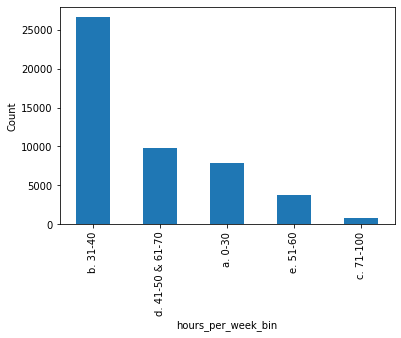

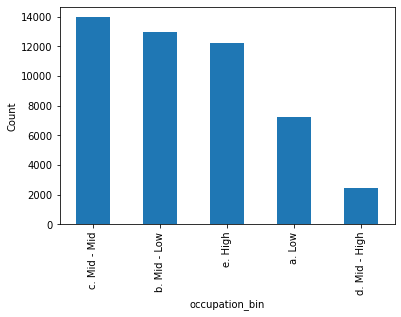

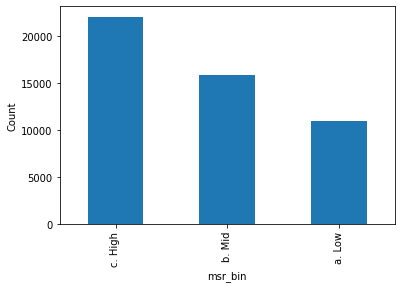

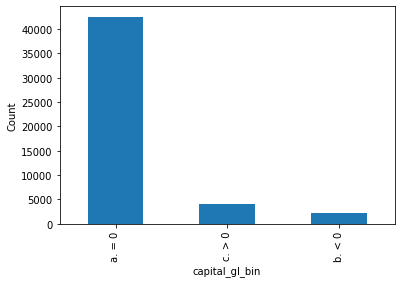

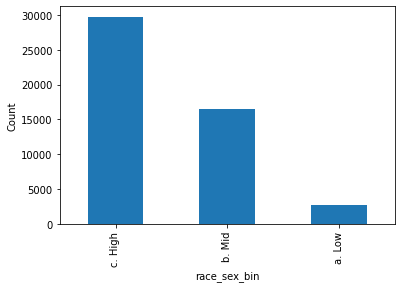

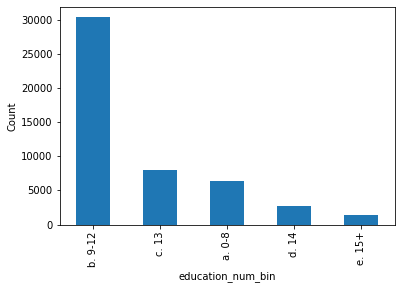

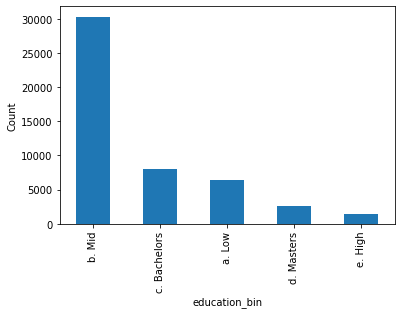

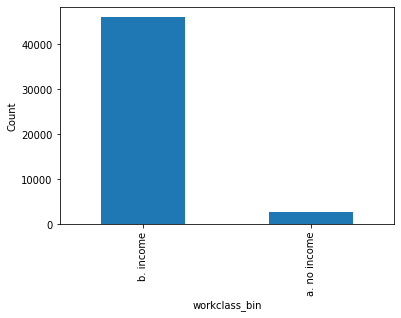

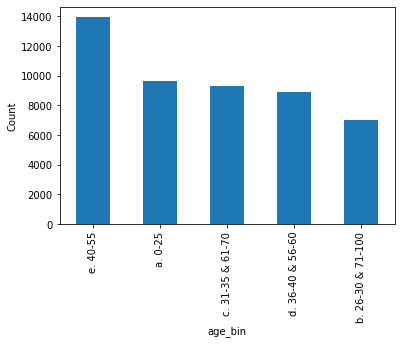

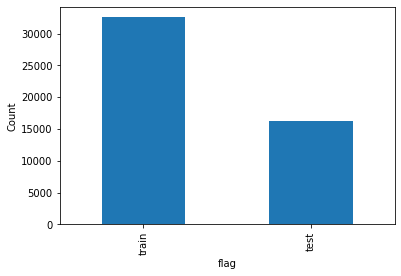

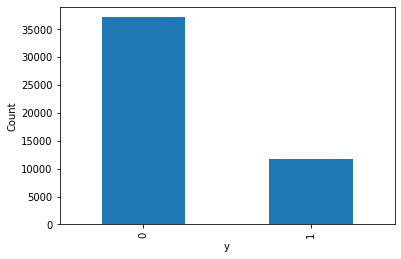

In [11]:
#@title Default title text
import matplotlib.pyplot as plt
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
# features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', "capital_gl_bin", 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']


for col in cityFeats:
  plt.figure()
  cityFeats_valueCounts = cityFeats[col].value_counts()
  cityFeats_valueCounts.plot(kind = 'bar', x = col, y = cityFeats_valueCounts)
  plt.xlabel(col)
  plt.ylabel('Count')


plt.show()

# Preprocessing



In [75]:
unwanted_chars = [', ', ' >', '<',' ']

for char in unwanted_chars:
    cityFeats['capital_gl_bin'] = cityFeats['capital_gl_bin'].str.replace(char, ' ')

cityFeats.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [16]:
cityFeats.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [17]:
independent_variables = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']
dependent_variables = 'y'
X = cityFeats.drop(columns=['y','flag'])
y = cityFeats['y']
X.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,b. 31-40,b. Mid - Low,b. Mid,c. 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100


In [49]:
train = cityFeats[cityFeats['flag'] =='train']
test = cityFeats[cityFeats['flag'] =='test']
x_train = train[independent_variables]
y_train = train[dependent_variables]
x_test = test[independent_variables]
y_test = test[dependent_variables]
x_test

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100
32564,b. 31-40,b. Mid - Low,c. High,c. 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25
...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60
48840,b. 31-40,b. Mid - Low,a. Low,c. 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55


In [50]:
# Encode the categorical variables, using the get_dummies() function.
# https://www.dataindependent.com/pandas/pandas-get-dummies/
# train_1 = x_train.copy()

x_train = pd.get_dummies(data = x_train, columns = independent_variables, drop_first=True)
x_test = pd.get_dummies(data = x_test, columns = independent_variables, drop_first=True)

x_train.head()


,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,msr_bin_b. Mid,msr_bin_c. High,capital_gl_bin_b. 0,capital_gl_bin_c. 0,race_sex_bin_b. Mid,race_sex_bin_c. High,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_b. income,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [76]:
x_train.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
x_test.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

# Logistic Regression

### Training and Testing Data

In [77]:
# Instantiate model and fit training data 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # instantiate model 

# Train your model - fit the model to the training dataset
log_reg.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Performance Metrics (Training Data)

In [137]:
# confusion matrix 
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

y_pred_lr = log_reg.predict(x_train)

cnf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred_lr)
precision = precision_score(y_true=y_train, y_pred=y_pred_lr)
recall = recall_score(y_true=y_train, y_pred=y_pred_lr)
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred_lr)

print(cnf_mat)
print('Precision: ', round(precision*100,2))
print('Recall: ', round(recall*100,2))
print('Accuracy: ', round(accuracy*100,2))

[[23082  1638]
 [ 3444  4397]]
Precision:  72.86
Recall:  56.08
Accuracy:  84.39


Accuracy: the proportion of total number of predictions that were correct

Precision: the proportion of positive cases that were correctly identified

Recall: proportion of actual positive cases which are correctly predicted by the model 

We see that the recall is moderately good and the precision is good. This suggests there is a recall-precision trade-off

The accuracy suggests that the model performs fairly well


Test Model

In [194]:
# show the output of model prediction
predicted_values = log_reg.predict(x_train)
print("The predicted values are: ", predicted_values)
log_reg.predict_proba(x_train)[0:10] # predicted probabilites


The predicted values are:  [0 1 0 ... 0 0 1]


array([[0.61036288, 0.38963712],
       [0.44858011, 0.55141989],
       [0.97188457, 0.02811543],
       [0.92546766, 0.07453234],
       [0.59924449, 0.40075551],
       [0.28239732, 0.71760268],
       [0.99647107, 0.00352893],
       [0.37700444, 0.62299556],
       [0.34955575, 0.65044425],
       [0.06552435, 0.93447565]])

In [202]:
y_scores =  log_reg.predict_proba(x_train)

In [216]:
# plt.figure(1, figsize=(4, 3))
# plt.clf()
# plt.scatter(x_train, y_scores.ravel(), color='black', zorder=20)

# XGBoost Classifier

### Training and Testing Data

In [139]:
# Train your model
import xgboost as xgb
xg_cla = xgb.XGBClassifier() # instantiate model 
xg_cla.fit(x_train,y_train)

# received error
# feature_names may not contain [, ] or <; must go back to cleaning step and remove redundant characters

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##### Performance Metrics (Training Data)

In [140]:
y_pred_xg = xg_cla.predict(x_train)

cnf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred_xg)
precision = precision_score(y_true=y_train, y_pred=y_pred_lr)
recall = recall_score(y_true=y_train, y_pred=y_pred_lr)
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred_lr)

print(cnf_mat)
print('Precision: ', round(precision*100,2))
print('Recall: ', round(recall*100,2))
print('Accuracy: ', round(accuracy*100,2))

[[23123  1597]
 [ 3476  4365]]
Precision:  72.86
Recall:  56.08
Accuracy:  84.39


In [141]:
# show the output of model prediction
predicted_values = xg_cla.predict(x_test)
print("The predicted values are: ", predicted_values)

The predicted values are:  [0 0 0 ... 1 0 1]


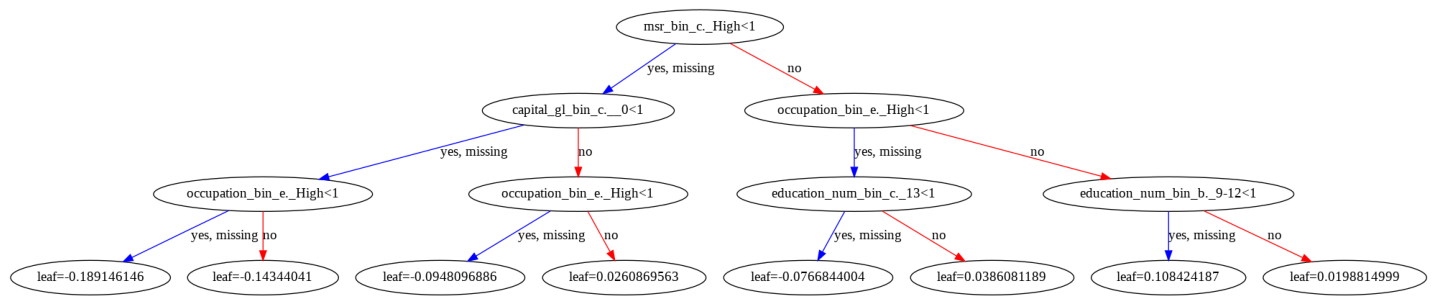

In [142]:
# decision tree of xgboost
from xgboost import plot_tree

plot_tree(xg_cla)
fig = plt.gcf()
fig.set_size_inches(25.5, 12.5)
# plot_tree(xg_cla,figsize=(16,9))
plt.show()

# Performance Metrics (Test Data)

F1-score:  0.632456140350877


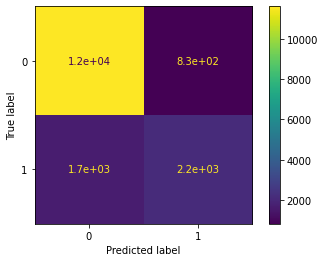

In [126]:
from sklearn.metrics import plot_confusion_matrix
# Calculate the F1 Score
plot_confusion_matrix(log_reg, x_test, y_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred_lr)
print('F1-score: ', f1) 

F1-score:  0.632456140350877


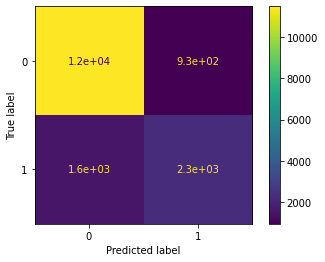

In [127]:
plot_confusion_matrix(xg_cla, x_test, y_test)
f1 = f1_score(y_true=y_test, y_pred=y_pred_lr)
print('F1-score: ', f1) 

In [117]:
# AUC curves for both models - refer to IBM capstone project 
from sklearn.metrics import roc_curve, roc_auc_score
y_roc = y_test
classifiers = [log_reg, xg_cla]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
#     model = cls.fit(X_train, y_train)
    yproba = cls.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_roc,  yproba)
    auc = roc_auc_score(y_roc, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)



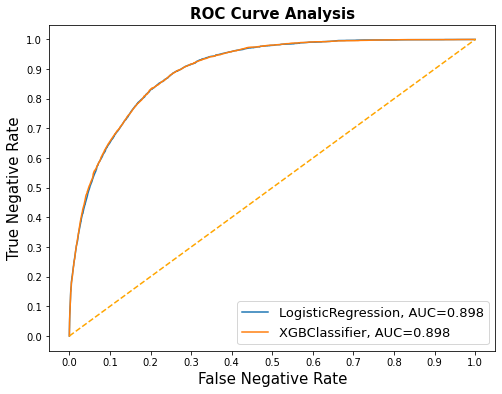

In [128]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Negative Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Negative Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Which model is performing better than the other ? 

Models are fairly equal with Logistic regression being slight better

# Bonus: Explore how you further optimise XGBoost Classifier with Paramater Tuning 

In [104]:
# Train your model
import xgboost as xgb
xg_cla = xgb.XGBClassifier() # instantiate model 
# xg_cla.fit(x_train,y_train)

# modelfit(xg_cla, x_train)

# received error
# feature_names may not contain [, ] or <; must go back to cleaning step and remove redundant characters

In [105]:
n_estimators = range(50,400,50)
max_depth = range(1,11,2)
min_child_weight = [1, 2, 4, 6, 8]
hyperparameter_grid = {'n_estimators': n_estimators,
'max_depth': max_depth,
'min_child_weight': min_child_weight}

In [110]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(xg_cla, hyperparameter_grid, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

# tree_cv.fit(x_train, y_train)

In [111]:
grid_result = tree_cv.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.3min finished


Best: 0.844692 using {'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 2}


In [114]:
xg_cla = xgb.XGBClassifier(n_estimators = 1000, min_child_weight=2, max_depth=2)
xg_cla.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
y_pred_xg = xg_cla.predict(x_train)
cnf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred_xg)
cnf_mat
# precision = precision_score(y_true=y_train, y_pred=y_pred_xg)
# print('Precision: {}'.format(round(precision*100), 2),'%')
# recall = recall_score(y_true=y_train, y_pred=y_pred_xg)

array([[22917,  1803],
       [ 3183,  4658]])